# Project 8: Machine Learning for Predictive Analytics

- **Project** : Reducing monthly churn by identifying high risk customers well in advance
- **About the Project**: The project relates to applying predictive analytics on customer churn. A major telecom company’s postpaid business of voice-only plans is struggling to maintain its strong foothold in local market because of:

    - High churn rate amongst customers leading to a revenue decline of ~500k USD every month
        - Decline in overall customer base (high churn rate combined with low acquisition rate), leading to a decline in total market share


## Packages and setup

In [109]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from copy import deepcopy
from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv("Telecom Data.csv")
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape
cust_df.info()



(51047, 58)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [4]:
cust_df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [5]:
cust_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,51047.0,3.201957e+06,116905.561666,3000002.00,3100632.00,3201534.00,3305376.000,3399994.00
MonthlyRevenue,50891.0,5.883449e+01,44.507336,-6.17,33.61,48.46,71.065,1223.38
MonthlyMinutes,50891.0,5.256534e+02,529.871063,0.00,158.00,366.00,723.000,7359.00
TotalRecurringCharge,50891.0,4.683009e+01,23.848871,-11.00,30.00,45.00,60.000,400.00
DirectorAssistedCalls,50891.0,8.952290e-01,2.228546,0.00,0.00,0.25,0.990,159.39
OverageMinutes,50891.0,4.002778e+01,96.588076,0.00,0.00,3.00,41.000,4321.00
RoamingCalls,50891.0,1.236244e+00,9.818294,0.00,0.00,0.00,0.300,1112.40
PercChangeMinutes,50680.0,-1.154791e+01,257.514772,-3875.00,-83.00,-5.00,66.000,5192.00
PercChangeRevenues,50680.0,-1.191985e+00,39.574915,-1107.70,-7.10,-0.30,1.600,2483.50
DroppedCalls,51047.0,6.011489e+00,9.043955,0.00,0.70,3.00,7.700,221.70


In [6]:
# Check unique customer
cust_df.CustomerID.nunique()/cust_df.shape[0]

1.0

In [7]:
cust_df.Churn.value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [8]:
cust_df.Churn.value_counts(normalize=True)

No     0.711815
Yes    0.288185
Name: Churn, dtype: float64

In [9]:
100*cust_df.Churn.value_counts()/cust_df.shape[0]

No     71.18146
Yes    28.81854
Name: Churn, dtype: float64

In [10]:
cust_df.UniqueSubs.dtype

dtype('int64')

In [11]:
Cat_col =[]
for i in cust_df:
    if i ==object:
        Cat_col.append(i)
Cat_col

[]

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [12]:
#How many customers had zero monthly revenue?
cust_df[cust_df.MonthlyRevenue== 0].shape[0]
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis



6

In [13]:
# Excluding the Customers with zero monthly revenue
cust_df = cust_df[cust_df.MonthlyRevenue>0.0]

In [14]:
# Excluding the customer with zero monthly minutes
cust_df = cust_df[cust_df.MonthlyMinutes>0.0]

In [15]:
cust_df.shape

(50162, 58)

- We can see that earlier the total number of rows was **51047** and now it is **50162**

### Q1.2 How many columns has missing values percentage > 5%

In [16]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

100*(cust_df.isnull().sum()/cust_df.shape[0])

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.344883
PercChangeRevenues           0.344883
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

In [17]:
# since the count of missing value is negligible I believe we can simply drop those rows
cust_df.dropna(axis=0,inplace=True)
cust_df.shape

(49078, 58)

- we can clearly find the less rows

<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)
    - as the percentage of missing values are less, thus we can drop these rows. It won't affect significantly

In [18]:
# Lets understand the data with pairplot
pair = cust_df.drop('CustomerID', axis= 1)


In [19]:
# #plotting the pairplot
# sns.pairplot(pair, diag_kind='kde', hue='Churn')
# plt.show()

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

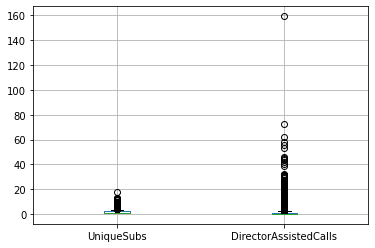

In [20]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.69
0.98,4.0,6.93
0.99,5.0,9.65
1.00,18.0,159.39


<AxesSubplot:>

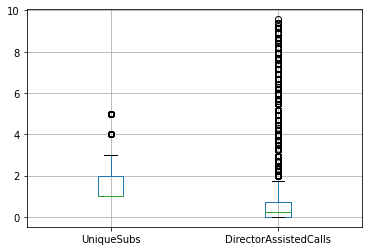

In [21]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers

q_value = [i/100 for i in range(95,101,1)]
cust_df[cols].quantile(q_value)

## filtering the cust_df data with 99% value
cust_df = cust_df[(cust_df.UniqueSubs <= 5) & (cust_df.DirectorAssistedCalls <= 9.6156)]
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)
plt.show()

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

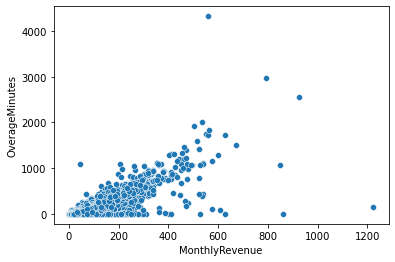

In [22]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df )

Text(0.5, 1.0, 'Non Churned customer')

<AxesSubplot:title={'center':'Non Churned customer'}, xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

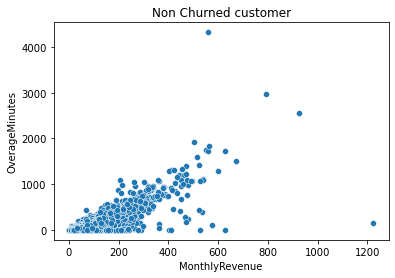

Text(0.5, 1.0, 'Churned customer')

<AxesSubplot:title={'center':'Churned customer'}, xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

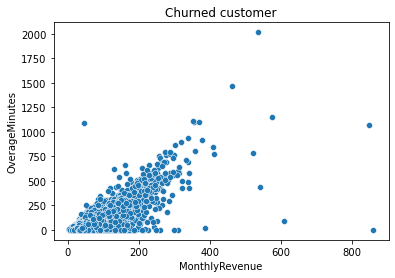

In [23]:
plt.title("Non Churned customer")
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn=="No"])
plt.show()

plt.title("Churned customer")
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn=="Yes"])
plt.show()

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis
    
- we can see the clear direct relationship between **MonthlyRevenue** and **OverageMinutes**

Text(0.5, 1.0, 'Non Churned customer')

<AxesSubplot:title={'center':'Non Churned customer'}, xlabel='MonthlyRevenue', ylabel='PercChangeMinutes'>

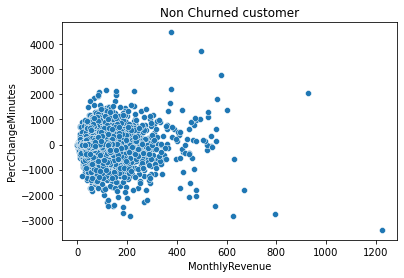

Text(0.5, 1.0, 'Churned customer')

<AxesSubplot:title={'center':'Churned customer'}, xlabel='MonthlyRevenue', ylabel='PercChangeMinutes'>

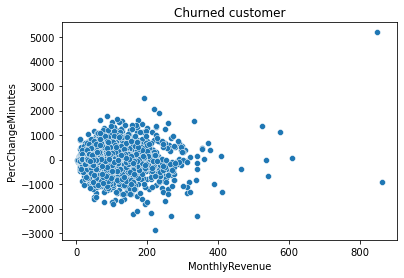

In [24]:
plt.title("Non Churned customer")
sns.scatterplot(x = 'MonthlyRevenue', y = 'PercChangeMinutes', data = cust_df[cust_df.Churn=="No"])
plt.show()

plt.title("Churned customer")
sns.scatterplot(x = 'MonthlyRevenue', y = 'PercChangeMinutes', data = cust_df[cust_df.Churn=="Yes"])
plt.show()

- I wanted to explore with **PercChangeMinutes** but could not find any significant information

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

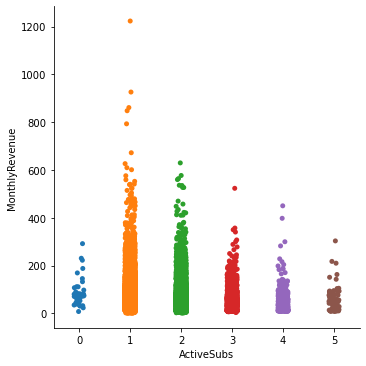

In [25]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x="ActiveSubs",y="MonthlyRevenue",data = cust_df )  
plt.show()

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis
    
    - from the above chart it is clear that, number of subscription is not directly related to the revenue, with the higher number of category plot the monthly revenue decreases 

### Q2.3 Does credit rating have an impact in churn rate?

In [26]:
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r: r/r.sum(), axis=0)
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r: r/r.sum(), axis=1)


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.698608,0.7039,0.69738,0.745876,0.785889,0.739905,0.718026
Yes,0.301392,0.2961,0.30262,0.254124,0.214111,0.260095,0.281974


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.161849,0.371062,0.160179,0.109358,0.138555,0.017938,0.041060
Yes,0.177734,0.397318,0.176928,0.094840,0.096086,0.016051,0.041044


<mark>__Result:__
    
Type your interpretation here based on the analysis above
    
- It seems people irrespective of their credit rating customers are churning and the proportion of churned custmer is 
    larger on high credit score. 

### Placeholder for additional exploratory analysis

In [27]:
cust_df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

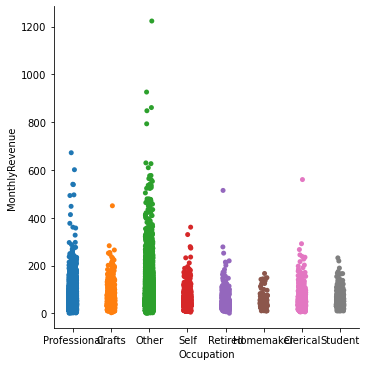

In [28]:
sns.catplot(x="Occupation",y="MonthlyRevenue",data = cust_df )  
plt.show()

- We can find that people with other occupation leading to more revenue.

## Q3. Create additional features to help predict churn

In [29]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
#     cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge'] / cust_df["MonthlyRevenue"]
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minute']= cust_df['OverageMinutes'] / cust_df["MonthlyMinutes"]
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    #3.4 Percent of RoamingCalls minutes over total monthly minutes
    cust_df['perc_Roaming_Calls']= cust_df['RoamingCalls'] / cust_df["MonthlyMinutes"]

    #3.5 Percent of DroppedCalls minutes over total monthly minutes
    cust_df['perc_Dropped_Calls']= cust_df['DroppedCalls'] / cust_df["MonthlyMinutes"]
    
    #3.6 Percent of BlockedCalls minutes over total monthly minutes
    cust_df['perc_Blocked_Calls ']= cust_df['BlockedCalls'] / cust_df["MonthlyMinutes"]
    
    #3.7 Percent of UnansweredCalls minutes over total monthly minutes
    cust_df['perc_Unanswered_Calls']= cust_df['UnansweredCalls'] / cust_df["MonthlyMinutes"]
    
    #3.8 Percent of CustomerCareCalls minutes over total monthly minutes
    cust_df['perc_Customer_Care_Calls']= cust_df['CustomerCareCalls'] / cust_df["MonthlyMinutes"]
    
    #3.9 Percent of ThreewayCalls minutes over total monthly minutes
    cust_df['perc_Threeway_Calls']= cust_df['ThreewayCalls'] / cust_df["MonthlyMinutes"]
    
    #3.10 Percent of ReceivedCalls minutes over total monthly minutes
    cust_df['perc_Received_Calls']= cust_df['ReceivedCalls'] / cust_df["MonthlyMinutes"]
    
    #3.11 Percent of OutboundCalls minutes over total monthly minutes
    cust_df['perc_OutboundCalls']= cust_df['OutboundCalls'] / cust_df["MonthlyMinutes"]
    
    #3.12 Percent of InboundCalls minutes over total monthly minutes
    cust_df['perc_Inbound_Calls']= cust_df['InboundCalls'] / cust_df["MonthlyMinutes"]
    
    #3.13 Percent of PeakCallsInOut minutes over total monthly minutes
    cust_df['perc_PeakCalls_InOut']= cust_df['PeakCallsInOut'] / cust_df["MonthlyMinutes"]
    
    #3.14 Percent of OffPeakCallsInOut minutes over total monthly minutes
    cust_df['perc_Off_PeakCalls_InOut']= cust_df['OffPeakCallsInOut'] / cust_df["MonthlyMinutes"]
    
    #3.15 Percent of OffPeakCallsInOut minutes over total monthly minutes
    cust_df['perc_Off_PeakCalls_InOut']= cust_df['OffPeakCallsInOut'] / cust_df["MonthlyMinutes"]
    
    return cust_df  


In [30]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)


In [31]:
# Understanding correlation in features

corr= cust_df.corr()
corr

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,perc_Dropped_Calls,perc_Blocked_Calls,perc_Unanswered_Calls,perc_Customer_Care_Calls,perc_Threeway_Calls,perc_Received_Calls,perc_OutboundCalls,perc_Inbound_Calls,perc_PeakCalls_InOut,perc_Off_PeakCalls_InOut
CustomerID,1.000000,0.000724,0.089867,0.053465,0.002476,0.006974,0.003415,-0.007642,0.005220,0.066681,...,-0.010648,-0.006537,-0.006815,0.030518,0.019699,-0.011621,-0.035781,-0.005626,-0.154121,0.022874
MonthlyRevenue,0.000724,1.000000,0.695495,0.615313,0.370969,0.783614,0.299244,-0.020370,-0.018393,0.411059,...,-0.062543,-0.048130,-0.087314,-0.025705,-0.022155,0.242876,-0.021449,0.034678,-0.079830,-0.044832
MonthlyMinutes,0.089867,0.695495,1.000000,0.565125,0.356932,0.552228,0.104522,-0.039267,-0.036142,0.581176,...,-0.103133,-0.069010,-0.114586,-0.013952,-0.032173,0.311635,-0.044633,0.074996,-0.220590,0.037628
TotalRecurringCharge,0.053465,0.615313,0.565125,1.000000,0.297550,0.175092,0.071620,-0.011153,-0.020264,0.335095,...,-0.066277,-0.053690,-0.102032,-0.035398,-0.024154,0.194200,-0.018581,0.033088,-0.090734,-0.069722
DirectorAssistedCalls,0.002476,0.370969,0.356932,0.297550,1.000000,0.240749,0.053773,-0.018977,-0.012888,0.240131,...,-0.027550,-0.030744,-0.033888,-0.017734,-0.013090,0.069857,0.018149,0.001483,0.004898,-0.013203
OverageMinutes,0.006974,0.783614,0.552228,0.175092,0.240749,1.000000,0.061731,-0.023420,-0.017201,0.314482,...,-0.045492,-0.028210,-0.051077,-0.015845,-0.011601,0.194446,-0.015132,0.029035,-0.050758,-0.015237
RoamingCalls,0.003415,0.299244,0.104522,0.071620,0.053773,0.061731,1.000000,-0.045361,-0.070735,0.061721,...,-0.007627,-0.009323,-0.021702,-0.006839,-0.005912,-0.009579,-0.022748,-0.022690,-0.040066,-0.042807
PercChangeMinutes,-0.007642,-0.020370,-0.039267,-0.011153,-0.018977,-0.023420,-0.045361,1.000000,0.614050,-0.081210,...,-0.034049,-0.009913,-0.024601,-0.008875,-0.004888,-0.107500,-0.035827,-0.037557,-0.065056,-0.069020
PercChangeRevenues,0.005220,-0.018393,-0.036142,-0.020264,-0.012888,-0.017201,-0.070735,0.614050,1.000000,-0.036776,...,-0.015892,-0.003175,-0.017687,-0.003849,0.003097,-0.064827,-0.017715,-0.019855,-0.043908,-0.031466
DroppedCalls,0.066681,0.411059,0.581176,0.335095,0.240131,0.314482,0.061721,-0.081210,-0.036776,1.000000,...,0.332718,-0.032488,0.008752,0.011110,0.006180,0.238505,0.102802,0.099902,-0.004025,0.195153


In [32]:
# sns.pairplot(corr, diag_kind='kde')

<Figure size 2520x1440 with 0 Axes>

<AxesSubplot:>

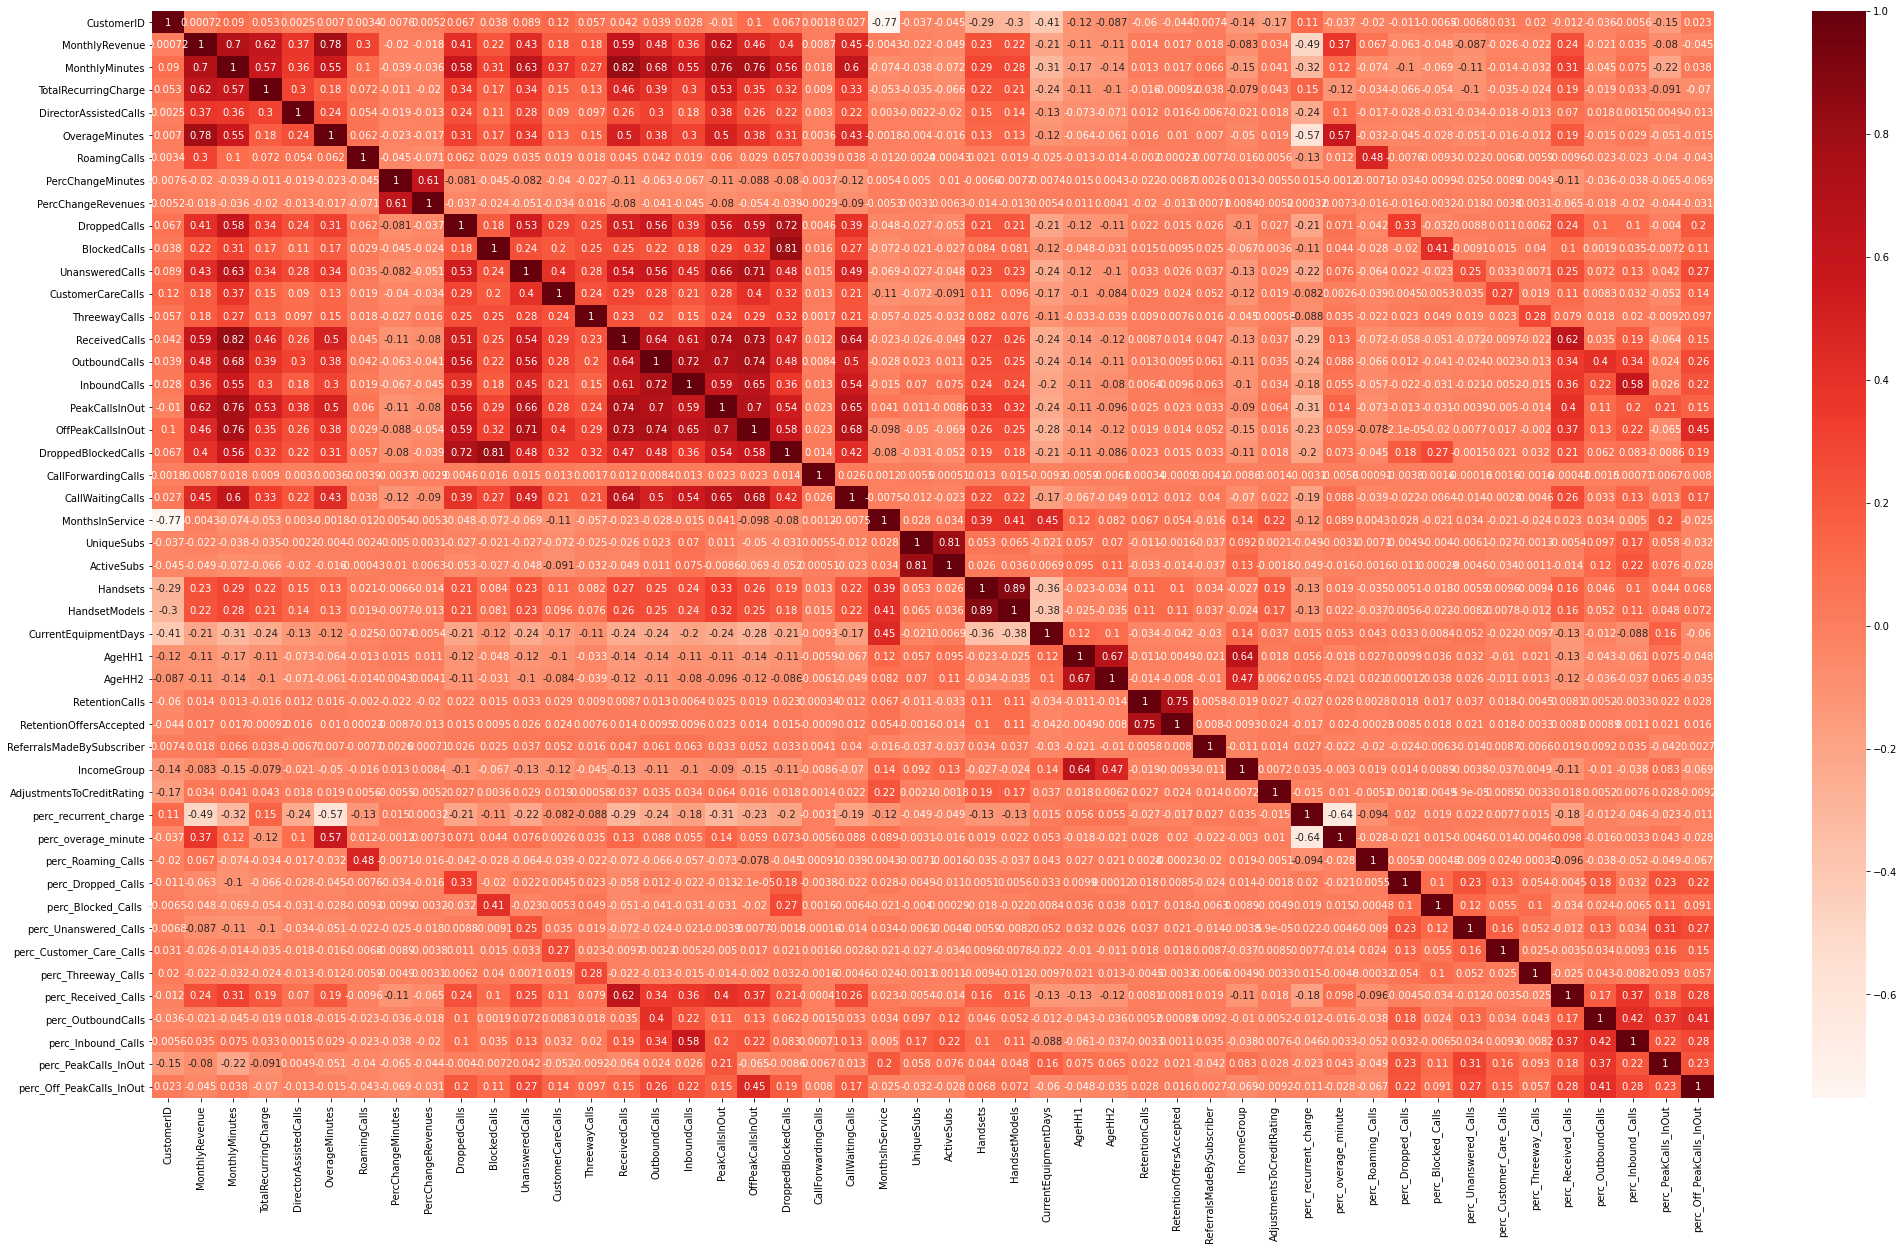

In [33]:
plt.figure(figsize=(35,20))
sns.heatmap(corr, annot= True,cmap= 'Reds')
plt.show()

- https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [34]:
corr.columns


Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating', 'perc_recurrent_charge',
       'perc_overage_minute', 'perc_Roaming_Calls', 'perc_Dropped_Calls',
       'perc_Blocked_Calls ', 'perc_Unanswered_Calls',
       'perc_Customer_Care_Calls', 'perc_Threeway_Calls',
       'perc_Received_Calls', 'perc_OutboundCalls', '

In [35]:
df = cust_df.drop(['MonthlyMinutes','OverageMinutes','ReceivedCalls','PeakCallsInOut','OffPeakCallsInOut','UnansweredCalls'],axis= 1, inplace=True)

In [38]:
## A function that helps to separate the columns whether they are categorical or continous variable.
## It returns list of categroical and continous variable names
def check_categorical(cust_df):
    colnames = cust_df.columns
    categorical_col = []
    continous_col = []
    
    for i in colnames:
        if cust_df[i].nunique() < 20:
            if i != "Churn":
                categorical_col.append(i)
        else:
            if i not in  ["CustomerID","ServiceArea"]:
                continous_col.append(i)
    
    return (categorical_col,continous_col)

In [40]:
## a function that does chisqr test to validate whether the categorical variable is idependent of the churn rate or not.
## it helps us to filterout the categorical varaibles that has impact on churn.
## a function that does chisqr test to validate whether the categorical variable is idependent of the churn rate or not.
## it helps us to filterout the categorical varaibles that has impact on churn.

def check_categorical_imp(cust_df,categorical_col):
    new_categorical_col = []
    for i in categorical_col:
        if stats.chi2_contingency(pd.crosstab(cust_df.Churn, cust_df[i]))[1] > 0.05:
            pass
        else:
            new_categorical_col.append(i)
            
    return new_categorical_col

def check_categorical_imp(df,categorical_col):
    new_categorical_col = []
    for i in categorical_col:
        if stats.chi2_contingency(pd.crosstab(df.Churn,df[i]))[1] > 0.05:
            pass
        else:
            new_categorical_col.append(i)
            
    return new_categorical_col


In [41]:
categorical_col,continous_col = check_categorical(cust_df)

In [42]:
cust_df.shape

(48374, 65)

In [43]:
cust_df.Churn.value_counts()

No     34730
Yes    13644
Name: Churn, dtype: int64

In [44]:
cust_df["Churn"]=cust_df["Churn"].replace([ "Yes",  "No"],  [1,0])
class_count_0, class_count_1 = cust_df['Churn'].value_counts()


class_0 = cust_df[cust_df['Churn'] == 0]
class_1 = cust_df[cust_df['Churn'] == 1]# print the shape of the class

class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

cust_df = test_over
y = cust_df.Churn
y.value_counts()/len(y)*100


0    50.0
1    50.0
Name: Churn, dtype: float64

In [45]:
class_1_over

,CustomerID,Churn,MonthlyRevenue,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,perc_Dropped_Calls,perc_Blocked_Calls,perc_Unanswered_Calls,perc_Customer_Care_Calls,perc_Threeway_Calls,perc_Received_Calls,perc_OutboundCalls,perc_Inbound_Calls,perc_PeakCalls_InOut,perc_Off_PeakCalls_InOut
14581,3114774,1,36.12,32.0,0.00,0.0,-89.0,-2.2,3.3,1.3,...,0.009141,0.003601,0.013850,0.006371,0.0000,0.075346,0.027701,0.001939,0.258449,0.072022
17122,3134138,1,53.78,30.0,0.00,23.8,126.0,56.9,0.7,0.0,...,0.007447,0.000000,0.042553,0.000000,0.0000,0.023404,0.003191,0.000000,0.077660,0.021277
44439,3351862,1,29.99,30.0,0.00,0.0,6.0,0.0,0.0,5.0,...,0.000000,0.032895,0.034868,0.000000,0.0000,0.009211,0.052632,0.000000,0.188816,0.072368
41247,3328534,1,51.38,60.0,0.50,0.0,44.0,-1.4,3.3,0.7,...,0.005500,0.001167,0.034500,0.003833,0.0005,0.035167,0.007167,0.001667,0.104500,0.061667
37643,3300162,1,34.99,45.0,0.00,0.0,419.0,0.0,3.7,0.3,...,0.007773,0.000630,0.067857,0.000000,0.0000,0.186765,0.025210,0.009034,0.143487,0.109244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40871,3325686,1,146.72,68.0,0.25,14.8,281.0,92.8,3.7,2.7,...,0.003471,0.002533,0.034991,0.001220,0.0000,0.193621,0.051313,0.009381,0.068480,0.124109
3621,3028242,1,10.20,10.0,0.00,0.2,0.0,0.6,0.0,0.3,...,0.000000,0.003846,0.047436,0.000000,0.0000,0.376923,0.073077,0.012821,0.166667,0.252564
33803,3269470,1,31.23,40.0,0.99,0.2,32.0,1.7,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
31051,3247242,1,50.44,60.0,0.00,0.0,8.0,-0.4,1.3,0.0,...,0.030952,0.000000,0.023810,0.000000,0.0000,0.288095,0.064286,0.047619,0.285714,0.088095


In [46]:

## filters categorcal and continous column names 


## passes all categorical variable and returns only those that have impact on the churn. 
important_categorical_col = check_categorical_imp(cust_df,categorical_col)

# ## converting the churn indicator to numeric variable
# cust_df["Churn"]=cust_df["Churn"].replace([ "Yes",  "No"],  [1,0])

## storing the churn flag variable in y 
y = cust_df.Churn
customerid = cust_df.CustomerID
monthlyrevenue = cust_df.MonthlyRevenue
## keeping on the relevant columns from the data
cust_df = cust_df[important_categorical_col+continous_col]




#cust_df.drop(["Churn"],axis=1,inplace=True)
#customer_id = cust_df.CustomerID
#cust_df.drop(["CustomerID","ServiceArea"],axis=1,inplace=True)


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [47]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## scaling all continous variable from the dataframe
cust_df[continous_col] = sc.fit_transform(cust_df[continous_col])

#Create dummy variables for all categorical variables
cust_df = pd.get_dummies(cust_df, columns=important_categorical_col, drop_first=True)

In [48]:
y.value_counts()

0    34730
1    34730
Name: Churn, dtype: int64

In [49]:
## checking the proportion of churn and non churned customers
y.value_counts()/len(y)*100

0    50.0
1    50.0
Name: Churn, dtype: float64

In [50]:
len(important_categorical_col)

21

In [51]:
## splitting the customer churn data into train and test sets
cust_df["CustomerID"] = customerid
X = cust_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [52]:
y_train.value_counts()

1    24462
0    24160
Name: Churn, dtype: int64

In [53]:
X.shape

(69460, 129)

In [54]:
train_custid = X_train.CustomerID
test_custid = X_test.CustomerID
test_monthlyrevenue = X_test.MonthlyRevenue
X_train.drop(["CustomerID"],inplace=True,axis=1)
X_test.drop(["CustomerID"],inplace=True,axis=1)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [55]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,f1_score,plot_confusion_matrix,average_precision_score


logistic_classifier  = LogisticRegression(random_state=0).fit(X_train, y_train)
logistic_predt_train_output = logistic_classifier.predict_proba(X_train)[:, 1]

In [56]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
#type your code here to predict for X_test data set using the fitted model
logistic_predt_test_output = logistic_classifier.predict_proba(X_test)[:, 1]

In [57]:

def efficient_cutoff(actual_value,predicted):
    probability_cutoff = []
    f1_score_value = []
    
    for i in range(0,101):
        predicted_x = deepcopy(predicted)
        predicted_x[predicted_x >= i / 100] = 1
        predicted_x[predicted_x < i / 100] = 0
        probability_cutoff.append(i/100)
        f1_score_value.append(f1_score(actual_value,predicted_x))
    
    return (probability_cutoff,f1_score_value)

Text(0.5, 0, 'probability cuttoff value train')

Text(0, 0.5, 'f1_score train ')

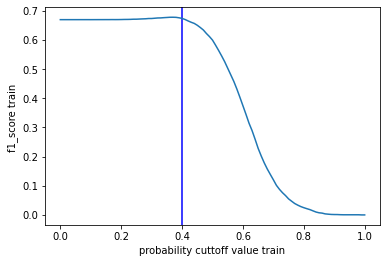

In [58]:
probability_cutoff,f1_score_value = efficient_cutoff(y_train,logistic_predt_train_output)

plt.xlabel("probability cuttoff value train")
plt.axvline(x = 0.4, color = 'b', label = 'axvline - full height')
plt.ylabel("f1_score train ")
plt.plot(probability_cutoff,f1_score_value)
plt.show()


In [59]:

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

logistic_predt_test_output[logistic_predt_test_output>=0.4] = 1
logistic_predt_test_output[logistic_predt_test_output <0.4] = 0

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
print(classification_report(y_test,logistic_predt_test_output))
auc = roc_auc_score(y_test, logistic_classifier.predict_proba(X_test)[:, 1])
print("gini :{}".format(2*auc - 1))
print("the ROC_AUC of logistic classifier for test data: {}".format(auc))
confusion_matrix(y_test, logistic_predt_test_output)
tn, fp, fn, tp = confusion_matrix(y_test, logistic_predt_test_output).ravel()
tn, fp, fn, tp

              precision    recall  f1-score   support

           0       0.68      0.25      0.36     10570
           1       0.53      0.88      0.66     10268

    accuracy                           0.56     20838
   macro avg       0.61      0.56      0.51     20838
weighted avg       0.61      0.56      0.51     20838

gini :0.2506724052719198
the ROC_AUC of logistic classifier for test data: 0.6253362026359599


array([[2611, 7959],
       [1228, 9040]], dtype=int64)

(2611, 7959, 1228, 9040)

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [60]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=15,min_samples_split=50,random_state=40,criterion="entropy",n_estimators=350,n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=50,
                       n_estimators=350, n_jobs=-1, random_state=40)

In [61]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data and train set using the fitted RF model
rf_train_output = clf.predict_proba(X_train)[:, 1]
rf_test_output = clf.predict_proba(X_test)[:, 1]


Text(0.5, 0, 'probability cuttoff value train')

Text(0, 0.5, 'f1_score train ')

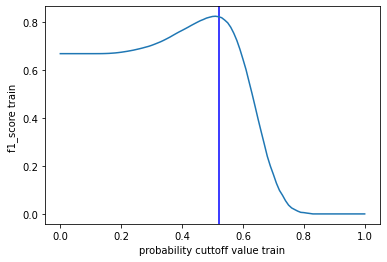

Text(0.5, 0, 'probability cuttoff value test')

Text(0, 0.5, 'f1_score test')

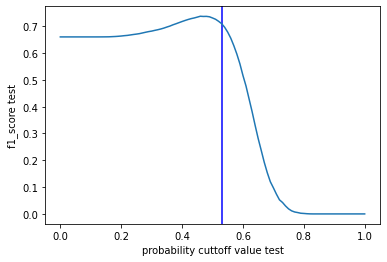

In [62]:
## plotting the f1_score vs the probility cutoff value
probability_cutoff,f1_score_value = efficient_cutoff(y_train,rf_train_output)

#plt.xticks(np.arange(1,100,10)/100)
plt.axvline(x = 0.52, color = 'b', label = 'axvline - full height')
plt.xlabel("probability cuttoff value train")
plt.ylabel("f1_score train ")
plt.plot(probability_cutoff,f1_score_value)
plt.show()

probability_cutoff,f1_score_value = efficient_cutoff(y_test,rf_test_output)
plt.axvline(x = 0.53, color = 'b', label = 'axvline - full height')
plt.xlabel("probability cuttoff value test")
plt.ylabel("f1_score test")
plt.plot(probability_cutoff,f1_score_value)
plt.show()


(array([ 129.,  541., 1143., 2149., 3241., 4865., 5260., 2743.,  693.,
          74.]),
 array([0.12297959, 0.19315627, 0.26333295, 0.33350963, 0.40368631,
        0.47386299, 0.54403967, 0.61421636, 0.68439304, 0.75456972,
        0.8247464 ]),
 <BarContainer object of 10 artists>)

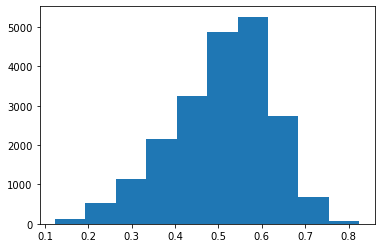

In [63]:
## plotting the histogram of the probability that the customer will churn
plt.hist(rf_test_output)

In [64]:

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
rf_test_output[rf_test_output<0.53] = 0
rf_test_output[rf_test_output>=0.53]  = 1

print(classification_report(y_test,rf_test_output))
test_auc = roc_auc_score(y_test,clf.predict_proba(X_test)[:, 1])
print("gini :{}".format(2*test_auc - 1))
print("the ROC_AUC for test rf classifier: {}".format(test_auc))
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

confusion_matrix(y_test, rf_test_output)
tn, fp, fn, tp = confusion_matrix(y_test, rf_test_output).ravel()
tn, fp, fn, tp

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     10570
           1       0.72      0.70      0.71     10268

    accuracy                           0.72     20838
   macro avg       0.72      0.72      0.72     20838
weighted avg       0.72      0.72      0.72     20838

gini :0.6032261779761245
the ROC_AUC for test rf classifier: 0.8016130889880623


array([[7854, 2716],
       [3128, 7140]], dtype=int64)

(7854, 2716, 3128, 7140)

<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?
    
    The random forest model has better predictive capability and the precisio,recall,confusionmatrix and auc value suggest 
    the same. We have selected the cutoff value in order to maximize the f1 score.
    
    

### Q4.3 Identify most important features impacting churn

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'feature Importance plot')

<AxesSubplot:title={'center':'feature Importance plot'}>

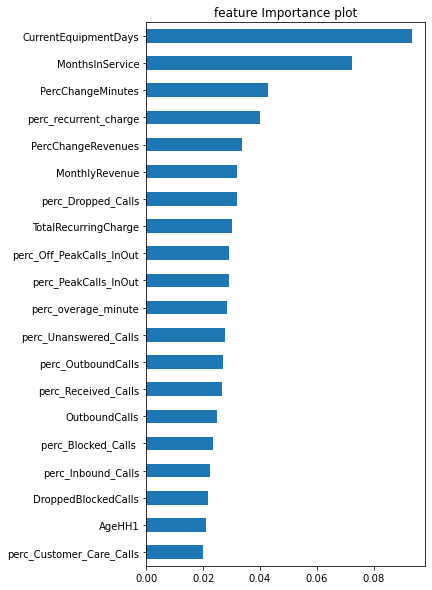

In [65]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(5,10))
plt.title("feature Importance plot")
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh',)
# .nlargest(20).sort(ascending=False)

In [66]:
feat_importances.sort_values(ascending=False).head()

CurrentEquipmentDays     0.093417
MonthsInService          0.072439
PercChangeMinutes        0.042691
perc_recurrent_charge    0.039956
PercChangeRevenues       0.033617
dtype: float64

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [67]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object
telc_df = pd.read_csv("Telecom - Prediction Data.csv")
display(telc_df.shape)
telc_df.head()


(20000, 58)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [68]:
# Preprocessing on the predicting data
telc_predict = telc_df.drop(['Churn'], axis= 1)

In [69]:
#wrapper function to create additional features for churn prediction
def create_features(telc_predict):
    
    #3.1 Percent of current active subs over total subs
#     telc_predict['perc_active_subs'] = telc_predict['ActiveSubs'] / telc_predict['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in telc_predict
    telc_predict['perc_recurrent_charge']= telc_predict['TotalRecurringCharge'] / telc_predict["MonthlyRevenue"]
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in telc_predict
    telc_predict['perc_overage_minute']= telc_predict['OverageMinutes'] / telc_predict["MonthlyMinutes"]
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    #3.4 Percent of RoamingCalls minutes over total monthly minutes
    telc_predict['perc_Roaming_Calls']= telc_predict['RoamingCalls'] / telc_predict["MonthlyMinutes"]

    #3.5 Percent of DroppedCalls minutes over total monthly minutes
    telc_predict['perc_Dropped_Calls']= telc_predict['DroppedCalls'] / telc_predict["MonthlyMinutes"]
    
    #3.6 Percent of BlockedCalls minutes over total monthly minutes
    telc_predict['perc_Blocked_Calls ']= telc_predict['BlockedCalls'] / telc_predict["MonthlyMinutes"]
    
    #3.7 Percent of UnansweredCalls minutes over total monthly minutes
    telc_predict['perc_Unanswered_Calls']= telc_predict['UnansweredCalls'] / telc_predict["MonthlyMinutes"]
    
    #3.8 Percent of CustomerCareCalls minutes over total monthly minutes
    telc_predict['perc_Customer_Care_Calls']= telc_predict['CustomerCareCalls'] / telc_predict["MonthlyMinutes"]
    
    #3.9 Percent of ThreewayCalls minutes over total monthly minutes
    telc_predict['perc_Threeway_Calls']= telc_predict['ThreewayCalls'] / telc_predict["MonthlyMinutes"]
    
    #3.10 Percent of ReceivedCalls minutes over total monthly minutes
    telc_predict['perc_Received_Calls']= telc_predict['ReceivedCalls'] / telc_predict["MonthlyMinutes"]
    
    #3.11 Percent of OutboundCalls minutes over total monthly minutes
    telc_predict['perc_OutboundCalls']= telc_predict['OutboundCalls'] / telc_predict["MonthlyMinutes"]
    
    #3.12 Percent of InboundCalls minutes over total monthly minutes
    telc_predict['perc_Inbound_Calls']= telc_predict['InboundCalls'] / telc_predict["MonthlyMinutes"]
    
    #3.13 Percent of PeakCallsInOut minutes over total monthly minutes
    telc_predict['perc_PeakCalls_InOut']= telc_predict['PeakCallsInOut'] / telc_predict["MonthlyMinutes"]
    
    #3.14 Percent of OffPeakCallsInOut minutes over total monthly minutes
    telc_predict['perc_Off_PeakCalls_InOut']= telc_predict['OffPeakCallsInOut'] / telc_predict["MonthlyMinutes"]
    
    #3.15 Percent of OffPeakCallsInOut minutes over total monthly minutes
    telc_predict['perc_Off_PeakCalls_InOut']= telc_predict['OffPeakCallsInOut'] / telc_predict["MonthlyMinutes"]
    
    return telc_predict  


In [70]:
#Make a call to the feature engineering wrapper function for churn prediction
telc_predict = create_features(telc_predict)

In [71]:
## A function that helps to separate the columns whether they are categorical or continous variable.
## It returns list of categroical and continous variable names
def check_categorical(telc_predict):
    colnames = telc_predict.columns
    categorical_col = []
    continous_col = []
    
    for i in colnames:
        if telc_predict[i].nunique() < 20:
            if i != "Churn":
                categorical_col.append(i)
        else:
            if i not in  ["CustomerID","ServiceArea"]:
                continous_col.append(i)
    
    return (categorical_col,continous_col)

In [72]:
## a function that does chisqr test to validate whether the categorical variable is idependent of the churn rate or not.
## it helps us to filterout the categorical varaibles that has impact on churn.

def check_categorical_imp(telc_predict,categorical_col):
    new_categorical_col = []
    for i in categorical_col:
        if stats.chi2_contingency(pd.crosstab(telc_predict.Churn, telc_predict[i]))[1] > 0.05:
            pass
        else:
            new_categorical_col.append(i)
            
    return new_categorical_col


In [73]:
categorical_col,continous_col = check_categorical(telc_predict)

In [74]:
telc_predict.shape

(20000, 70)

In [75]:
telc_predict = pd.get_dummies(telc_predict, columns=important_categorical_col, drop_first=True)

In [76]:
telc_predict.shape

(20000, 143)

In [77]:
telc_predict['Churn'] = clf.predict_proba(X_train)[28622:, 1]

In [78]:
round(telc_predict.Churn,2)
print(telc_predict.shape)
telc_predict.head()

0        0.38
1        0.38
2        0.75
3        0.54
4        0.49
         ... 
19995    0.43
19996    0.56
19997    0.53
19998    0.42
19999    0.29
Name: Churn, Length: 20000, dtype: float64

(20000, 144)


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_Unknown,MaritalStatus_Yes,Churn
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,0,1,0,0,0,0,0,0,0,0.379496
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,0,0,0,0,0,0,0,0,0,0.380531
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,0,0,0,0,0,1,0,0,1,0.749152
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,0,0,0,0,0,0,0,0,0,0.539244
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,0,0,0,0,0,1,0,0,0,0.494328


In [79]:
pd.DataFrame(telc_predict)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_Unknown,MaritalStatus_Yes,Churn
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,0,1,0,0,0,0,0,0,0,0.379496
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,0,0,0,0,0,0,0,0,0,0.380531
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,0,0,0,0,0,1,0,0,1,0.749152
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,0,0,0,0,0,0,0,0,0,0.539244
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,0,0,0,0,0,1,0,0,0,0.494328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,12.0,...,0,0,0,0,0,0,0,1,0,0.433013
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,1,0,0,1,0.562281
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,1,0,0,0,0.526589
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,...,0,0,0,0,0,0,0,1,0,0.424989


In [80]:
telc_predict

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_Unknown,MaritalStatus_Yes,Churn
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,0,1,0,0,0,0,0,0,0,0.379496
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,0,0,0,0,0,0,0,0,0,0.380531
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,0,0,0,0,0,1,0,0,1,0.749152
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,0,0,0,0,0,0,0,0,0,0.539244
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,0,0,0,0,0,1,0,0,0,0.494328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,12.0,...,0,0,0,0,0,0,0,1,0,0.433013
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,1,0,0,1,0.562281
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,1,0,0,0,0.526589
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,...,0,0,0,0,0,0,0,1,0,0.424989


In [81]:
telc_predict.columns

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls',
       ...
       'CreditRating_4-Medium', 'CreditRating_5-Low', 'CreditRating_6-VeryLow',
       'CreditRating_7-Lowest', 'PrizmCode_Rural', 'PrizmCode_Suburban',
       'PrizmCode_Town', 'MaritalStatus_Unknown', 'MaritalStatus_Yes',
       'Churn'],
      dtype='object', length=144)

In [82]:
telc_predict.Churn.dtypes

dtype('float64')

In [83]:
telc_predict.loc[telc_predict['Churn']=='','Churn'] =0.0

In [84]:
telc_predict.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_Unknown,MaritalStatus_Yes,Churn
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,0,1,0,0,0,0,0,0,0,0.379496
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,0,0,0,0,0,0,0,0,0,0.380531
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,0,0,0,0,0,1,0,0,1,0.749152
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,0,0,0,0,0,0,0,0,0,0.539244
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,0,0,0,0,0,1,0,0,0,0.494328


In [85]:
# telc_predict.Churn.value_cou

In [86]:
telc_predict['Churn'] = telc_predict['Churn'].astype('float64')

In [87]:
class_1 = telc_predict.Churn[telc_predict.Churn>0.5] =1
class_0 = telc_predict.Churn[telc_predict.Churn<0.5] =0

In [88]:
# class_0 = cust_df[cust_df['Churn'] == 0]
# class_1 = cust_df[cust_df['Churn'] == 1]

In [89]:
telc_predict.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_Unknown,MaritalStatus_Yes,Churn
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,0,1,0,0,0,0,0,0,0,0.0
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,0,0,0,0,0,0,0,0,0,0.0
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,0,0,0,0,0,1,0,0,1,1.0
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,0,0,0,0,0,0,0,0,0,1.0
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,0,0,0,0,0,1,0,0,0,0.0


In [90]:
telc_predict.Churn.dtype

dtype('float64')

In [91]:
telc_predict.Churn.value_counts()

1.0    11232
0.0     8768
Name: Churn, dtype: int64

In [92]:
telc_predict['Churn'] = telc_predict['Churn'].astype('object')

In [93]:
class_1 = telc_predict.Churn[telc_predict.Churn==1.0] ='Churn'
class_0= telc_predict.Churn[telc_predict.Churn==0.0] ='Not-Churn'

In [94]:
telc_predict.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_Unknown,MaritalStatus_Yes,Churn
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,0,1,0,0,0,0,0,0,0,Not-Churn
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,0,0,0,0,0,0,0,0,0,Not-Churn
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,0,0,0,0,0,1,0,0,1,Churn
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,0,0,0,0,0,0,0,0,0,Churn
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,0,0,0,0,0,1,0,0,0,Not-Churn


In [95]:
telc_predict.Churn.value_counts(normalize=True)

Churn        0.5616
Not-Churn    0.4384
Name: Churn, dtype: float64

- from unseen data we can find the 55 % of customers are churning and remaining are not churning.

## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [96]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)

#Type your code here to plot the lift chart from the best model

def calc_cumulative_gains(df: pd.DataFrame, actual_col: str, predicted_col:str, probability_col:str):

    df.sort_values(by=probability_col, ascending=False, inplace=True)

    subset = df
#     df[df[predicted_col] == True]

    rows = []
    for group in np.array_split(subset, 10):
        score= sum(group[actual_col].tolist())
#         score = sklearn.metrics.accuracy_score(group[actual_col].tolist(),
#                                                    group[predicted_col].tolist(),
#                                                    normalize=False)
        

        rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

    lift = pd.DataFrame(rows)

    #Cumulative Gains Calculation
    lift['RunningCorrect'] = lift['NumCorrectPredictions'].cumsum()
    lift['PercentCorrect'] = lift.apply(
        lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x['RunningCorrect'], axis=1)
    lift['CumulativeCorrectBestCase'] = lift['NumCases'].cumsum()
    lift['PercentCorrectBestCase'] = lift['CumulativeCorrectBestCase'].apply(
        lambda x: 100 if (100 / lift['NumCorrectPredictions'].sum()) * x > 100 else (100 / lift[
            'NumCorrectPredictions'].sum()) * x)
    lift['AvgCase'] = lift['NumCorrectPredictions'].sum() / len(lift)
    lift['CumulativeAvgCase'] = lift['AvgCase'].cumsum()
    lift['PercentAvgCase'] = lift['CumulativeAvgCase'].apply(
        lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x)

    #Lift Chart
    lift['NormalisedPercentAvg'] = 1
    lift['lift_score'] = lift['PercentCorrect'] / lift['PercentAvgCase']
    
    lift.drop(["CumulativeCorrectBestCase","AvgCase","PercentAvgCase","PercentCorrectBestCase","CumulativeAvgCase"],inplace=True,axis=1)
    return lift







In [97]:
d = {'y': y_test, 'predicted_probability': clf.predict_proba(X_test)[:,1],"predicted" : rf_test_output,"CustomerID":test_custid}
df = pd.DataFrame(data=d)
df.head()


import sklearn
lift =calc_cumulative_gains(df,"y","predicted","predicted_probability")


,y,predicted_probability,predicted,CustomerID
20967,1,0.530407,1.0,3164374
17166,1,0.647730,1.0,3134502
43106,0,0.243175,0.0,3342354
6055,1,0.662918,1.0,3047434
22872,1,0.499258,0.0,3179898


In [98]:
lift

,NumCases,NumCorrectPredictions,RunningCorrect,PercentCorrect,NormalisedPercentAvg,lift_score
0,2084,1976,1976,19.244254,1,1.924425
1,2084,1678,3654,35.586287,1,1.779314
2,2084,1420,5074,49.415660,1,1.647189
3,2084,1249,6323,61.579665,1,1.539492
4,2084,1084,7407,72.136735,1,1.442735
5,2084,956,8363,81.447215,1,1.357454
6,2084,787,9150,89.111804,1,1.273026
7,2084,562,9712,94.585119,1,1.182314
8,2083,374,10086,98.227503,1,1.091417
9,2083,182,10268,100.000000,1,1.000000


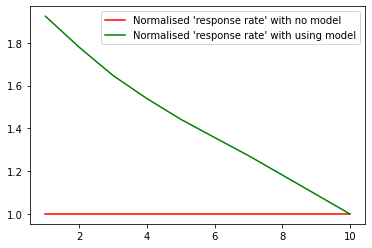

In [99]:
 def plot_lift_chart(lift: pd.DataFrame):
        plt.figure()
        plt.plot([i for i in range(1,11)],lift['NormalisedPercentAvg'], 'r-', label='Normalised \'response rate\' with no model')
        plt.plot([i for i in range(1,11)],lift['lift_score'],'g-', label='Normalised \'response rate\' with using model')
        plt.legend()
        plt.show()

plot_lift_chart(lift)

In [100]:
df = df.drop_duplicates(["CustomerID"])
cust_df=pd.read_csv("Telecom Data.csv")
df = df.merge(cust_df[["CustomerID","MonthlyRevenue"]] , left_on='CustomerID', right_on='CustomerID',how="inner")

In [101]:
df = df[df.y==1]
df.sort_values(by="predicted_probability", ascending=False, inplace=True)
df.loc[:round(0.2*df.shape[0]),"MonthlyRevenue"].sum()

82623.04000000001

<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
    - the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability is 53%
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
       
    - total monthly revenue of actual churn customers identified in the top 20% of the customers is **82623.04**